In [50]:
import cv2
import pprint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [118]:
image = cv2.imread("ti.jpg",  cv2.IMREAD_COLOR)

In [119]:
print(image.shape)
print(image.size)
print(image.dtype)

(428, 640, 3)
821760
uint8


In [135]:
image = cv2.imread("apple.jpg",  cv2.IMREAD_COLOR)
new_img = np.ones_like((image),dtype=np.uint8)*255
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 125, 1)
# 根据最上面的点的像素来判断后面 二值化的结果
if gray[1][1] == 0:    
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
if gray[1][1] == 255:
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
outimg, contours, hireachy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
top_lines = []
botton_lines = []
left_lines = []
right_lines = []

for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
 
    if area > 10000:
        print(area)
        x, y, w, h  = cv2.boundingRect(contour)
        mm = cv2.moments(contour)
        
        epsilon = 0.01*cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        hull = cv2.convexHull(approx, True)
        cv2.drawContours(image, hull, -1, (0,0,0),10)

#         approxCurve = cv2.approxPolyDP(contour, 4, True)
#         if approxCurve.shape[0] > 4:
# #             cv2.drawContours(image, contours, i, (0,255,0), 2)
#             cv2.drawContours(new_img, contours, i, (0,255,255), -1)
            
#         if approxCurve.shape[0] == 4:
#             cv2.drawContours(new_img, contours, i, (0,0,0), 2)

#             gray_new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
#             edges = cv2.Canny(gray_new_img, 100,200) 
#             lines = cv2.HoughLinesP(edges, 1.0, 2*np.pi/180, 100, 5, minLineLength=10, maxLineGap=3)
#             print(lines.shape)
#             lines1 = lines[:,0,:]#提取为二维
#             for x1,y1,x2,y2 in lines1[:]: 
#                 if abs(x1 - x2)> abs(y1 - y2):
#                     if y1 < 250:
#                         top_lines.append((x1,y1,x2,y2))
#                         cv2.line(image,(x1,y1),(x2,y2),(255,0,0),1)
            
            
            
#         gray_new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
#         edges = cv2.Canny(gray_new_img, 100,200) 
#         print(edges.shape)
#         lines = cv2.HoughLinesP(edges, 1.0, 2*np.pi/180, 100, 5, minLineLength=10, maxLineGap=3)
#         lines1 = lines[:,0,:]#提取为二维
#         for x1,y1,x2,y2 in lines1[:]: 
            
#             if abs(x1 - x2)> abs(y1 - y2):
#                 if y1 < 250:
#                     top_lines.append((x1,y1,x2,y2))
#                     cv2.line(image,(x1,y1),(x2,y2),(255,0,0),1)
#                 else:
#                     botton_lines.append((x1,y1,x2,y2))
#                     cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)
#             else:
#                 if x1 < 250:
#                     left_lines.append((x1,y1,x2,y2))
#                     cv2.line(image,(x1,y1),(x2,y2),(0,0,255),1)
#                 else:
#                     right_lines.append((x1,y1,x2,y2))
#                     cv2.line(image,(x1,y1),(x2,y2),(255,255,0),1)

        
# # plt.subplot(221)
# # plt.imshow(image)

# # plt.subplot(222)
# # plt.imshow(binary)
# # plt.subplot(223)
# # plt.imshow(new_img)


# plt.show()
cv2.imshow("image",image) 
cv2.imshow("binary", binary)
cv2.imshow("new_img",new_img) 

cv2.waitKey(0)
cv2.destroyAllWindows()

109358.0
[[[543  66]]

 [[472 340]]

 [[155 340]]

 [[ 60  66]]]


In [181]:
lines = hull[:,0,:]
dd = int((lines.max()-lines.min())/2)
point_lines = lines-(dd,dd)
for i in range(len(point_lines)):
    if point_lines[i][0] < 0 and point_lines[i][1] < 0:
        A = lines[i]
    elif point_lines[i][0] > 0 and point_lines[i][1] < 0:
        B = lines[i]
    elif point_lines[i][0] < 0 and point_lines[i][1] > 0:
        C = lines[i]
    elif point_lines[i][0] > 0 and point_lines[i][1] > 0:
        D = lines[i]

In [178]:
len(point_lines)

4

In [113]:
def cross_point(line1,line2):#计算交点函数
    x1=line1[0]#取四点坐标
    y1=line1[1] 
    x2=line1[2]
    y2=line1[3]
    print(x1,y1,x2,y2)
    
    x3=line2[0]
    y3=line2[1]
    x4=line2[2]
    y4=line2[3]
    print(x3,y3,x4,y4)

    
    k1=(y2-y1)*1.0/(x2-x1)#计算k1,由于点均为整数，需要进行浮点数转化
    b1=y1*1.0-x1*k1*1.0#整型转浮点型是关键
    if (x4-x3)==0:#L2直线斜率不存在操作
        k2=None
        b2=0
    else:
        k2=(y4-y3)*1.0/(x4-x3)#斜率存在操作
        b2=y3*1.0-x3*k2*1.0
    if k2==None:
        x=x3
    else:
        x=(b2-b1)*1.0/(k1-k2)
    y=k1*x*1.0+b1*1.0
    return [int(x), int(y)]

In [114]:
A = cross_point(top_lines[0], left_lines[0])
B = cross_point(top_lines[0], right_lines[0])
C = cross_point(botton_lines[0], left_lines[0])
D = cross_point(botton_lines[0], right_lines[0])

IndexError: list index out of range

In [182]:
print([A,B,C,D])
corners = np.float32([A,B,C,D])
canvas = np.float32([[0, 0],[600, 0],[0,400],[600,400]])
M = cv2.getPerspectiveTransform(corners, canvas)
result = cv2.warpPerspective(image, M, (600, 400))

[array([60, 66], dtype=int32), array([543,  66], dtype=int32), array([155, 340], dtype=int32), array([472, 340], dtype=int32)]


In [184]:
# image = cv2.imread(r"ti.jpg",1)
# rows,cols,ch=img.shape
# key_point = np.array([[64, 58] ,[611, 58] ,[81, 394] ,[593, 394]]) 
# reimage_point = np.array([[0, 0],[600, 0],[600,400],[0,400]])

# M = cv2.getPerspectiveTransform(reimage_point, key_point)
# result = cv2.warpPerspective(image, M, (cols,rows))

cv2.imshow("result",result) 

cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
key_point = np.array([A,B,C,D]) 
key_point.shape
reimage_point = np.array([[0, 0],[600, 0],[600,400],[0,400]])
reimage_point.shape


(428, 640, 3)

In [6]:
# 第三步：前后背景分离
mask = np.zeros(image.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# image shape=398, 299

# rect = (50,50,image_shape[0]-50,image_shape[1]-50) 需要指定前后背景的位置
image_shape = image.shape
rect = (50,50,image_shape[1]-20,image_shape[0]-20)

cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image4 = image*mask2[:,:,np.newaxis]

In [103]:
image5 = cv2.cvtColor(image4,cv2.COLOR_BGR2GRAY)
# 使用自适应阀值获取到图像
image6 = cv2.adaptiveThreshold(image5, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 1)

In [104]:
# 二值化自适应之后的图片
ret, thresh = cv2.threshold(image6, 127, 255,0)
# 找出矩形
im2,contours,hierarchy = cv2.findContours(thresh, cv2.REDUCE_MAX, cv2.CHAIN_APPROX_SIMPLE) 

contours_img = cv2.drawContours(image, contours, -1,(255,255,0), 1)


In [84]:
print(len(cnt))
print("*"*20)
for cnt in contours: 
#     print(cv2.arcLength(cnt, closed=True))
    if cv2.arcLength(cnt, closed=True) > 1600:
        
        [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
        for center in cnt[:,0,:]: 
            img = cv2.circle(image, (center[0], center[1]), 1,(0,255,12))
        print(cnt[:,0,:].shape)

17
********************
(234, 2)


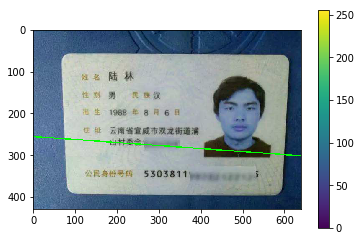

In [80]:
for cnt in contours:
    if cv2.arcLength(cnt, closed=True) > 1600:        
        # 画出直线
        rows,cols = image.shape[:2]
        [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
        lefty = int((-x*vy/vx) + y)
        righty = int(((cols-x)*vy/vx)+y)
        img = cv2.line(image,(cols-1,righty),(0,lefty),(0,255,0),2)     
        
plt.imshow(img)
plt.colorbar()
plt.show()

110
120
130
140
150
160
170
180
190
200
210
220
230
240
250


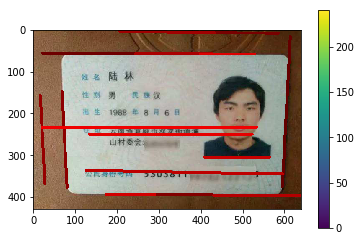

(15, 4)

In [51]:
# 提起边 cv2.HoughLinesP

edges = cv2.Canny(image6, 100, 50) 
# minLineLengh，线的最短长度，MaxLineCap，两条直线之间的最大间隔
lines = cv2.HoughLinesP(edges, 1.0, np.pi/180, 100, minLineLength=100, maxLineGap=100)

lines1 = lines[:,0,:]#提取为二维
i = 100 
for x1,y1,x2,y2 in lines1[:]: 
#     if abs(y2 - y1)> 100:
    cv2.line(image, (x1,y1), (x2,y2), (0,0,i),5)
    i = i+ 10
    print(i)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.colorbar()
plt.show()
lines1.shape


array([[595, 375, 614,  17],
       [ 21,  57, 270,  57],
       [389,   7, 586,  10],
       [291, 394, 430, 394],
       [ 69, 148,  81, 377],
       [ 17, 157,  28, 368],
       [205,   5, 433,   8],
       [244,  58, 430,  58],
       [431, 395, 638, 395],
       [127, 336, 596, 344],
       [408, 304, 566, 304],
       [175, 393, 290, 393],
       [399,  59, 529,  59],
       [134, 250, 523, 250],
       [ 20, 233, 534, 233]], dtype=int32)

In [122]:
cv2.imshow('thresh',thresh)    
cv2.imshow('image',image)    
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: mat is not a numerical tuple

In [109]:
cv2.imshow("new_img",new_img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

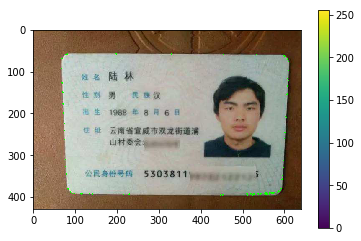

In [86]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.colorbar()
plt.show()

In [92]:
len(contours)

239

In [1]:
import cv2
import numpy as np

filename = 'ti.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3, 0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()] = [0,0,255]

cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
dst.shape

(428, 640)

In [48]:
import cv2
img=cv2.imread('ti.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp=sift.detect(gray,None)
img=cv2.drawKeypoints(gray, kp,img)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()